<h1>
  <span style="color:#0d8dfc;">ACTIVITY 2:</span>
  <span>UK ACCIDENT DATA ANALYTICS PROJECT</span>
</h1>

<hr>

<h1> ANALYST: RHEALYN VASQUEZ </h1>

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [262]:
uk_accidents = pd.read_csv('datasets\\uk_accident_data.csv')

In [263]:
#this shows the 5 first row
uk_accidents.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [264]:
#this shows quick summary of the DataFrame
uk_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [265]:
# this shows quick statistics about the data
uk_accidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [266]:
uk_accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1> FILLING MISSING VALUES/NULL VALUES </h1>

In [267]:
#mean - to handle missing values in numeric columns
for num in ['Latitude', 'Longitude']:
    uk_accidents[num] = uk_accidents[num].fillna(uk_accidents[num].mean())
    
#mode - to handle missing values in categorical columns
for cat in ['Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Weather_Conditions']:
    uk_accidents[cat] = uk_accidents[cat].fillna(uk_accidents[cat].mode()[0])

uk_accidents['Road_Type'] = uk_accidents['Road_Type'].fillna('Unknown')

In [268]:
uk_accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [269]:
uk_accidents['Index'] = uk_accidents['Index'].astype('category')
uk_accidents['Accident_Severity'] = uk_accidents['Accident_Severity'].astype('category')
uk_accidents['Accident Date'] = uk_accidents['Accident Date'].astype('str')
uk_accidents['Accident Date'] = uk_accidents['Accident Date'].str.replace('/', '-')
uk_accidents['Accident Date'] = pd.to_datetime(uk_accidents['Accident Date'], dayfirst = True, errors='coerce')
uk_accidents['Latitude'] = uk_accidents['Latitude'].astype('float')
uk_accidents['Longitude'] = uk_accidents['Longitude'].astype('float')
uk_accidents['Light_Conditions'] = uk_accidents['Light_Conditions'].astype('category')
uk_accidents['District Area'] = uk_accidents['District Area'].astype('category')
uk_accidents['Number_of_Casualties'] = uk_accidents['Number_of_Casualties'].astype('int')
uk_accidents['Number_of_Vehicles'] = uk_accidents['Number_of_Vehicles'].astype('int')
uk_accidents['Road_Surface_Conditions'] = uk_accidents['Road_Surface_Conditions'].astype('category')
uk_accidents['Road_Type'] = uk_accidents['Road_Type'].astype('category')
uk_accidents['Urban_or_Rural_Area'] = uk_accidents['Urban_or_Rural_Area'].astype('category')
uk_accidents['Weather_Conditions'] = uk_accidents['Weather_Conditions'].astype('category')
uk_accidents['Vehicle_Type'] = uk_accidents['Vehicle_Type'].astype('category')

In [270]:
uk_accidents.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1> EXTRACTING DATE INFORMATION USING PANDAS DATE TIME </h1>

In [271]:
uk_accidents['Year'] = uk_accidents['Accident Date'].dt.year
uk_accidents['Month'] = uk_accidents['Accident Date'].dt.month
uk_accidents['Month_Name'] = uk_accidents['Accident Date'].dt.month_name()
uk_accidents['Date'] = uk_accidents['Accident Date'].dt.day
uk_accidents['Day'] = uk_accidents['Accident Date'].dt.day_name()
uk_accidents['Week'] = uk_accidents['Accident Date'].dt.isocalendar().week

In [272]:
uk_accidents[['Accident Date', 'Year', 'Month', 'Month_Name', 'Date', 'Day', 'Week']].head()

,Accident Date,Year,Month,Month_Name,Date,Day,Week
0,2019-06-05,2019,6,June,5,Wednesday,23
1,2019-07-02,2019,7,July,2,Tuesday,27
2,2019-08-26,2019,8,August,26,Monday,35
3,2019-08-16,2019,8,August,16,Friday,33
4,2019-09-03,2019,9,September,3,Tuesday,36


<h1 style="color:#0d8dfc;"> DATA ANALYSIS</h1>
<hr>

<h1> DATA AGGREGATION</h1>

<h1> 1. Which district has the highest average number of casualties per accident? </h1>

In [273]:
district_casualties = uk_accidents.groupby("District Area")["Number_of_Casualties"].mean()
max_value = district_casualties.max()
district_casualties_percent = (district_casualties / max_value) * 100
result = pd.DataFrame({
    "Average_Casualties": district_casualties,
    "Percentage_of_Max": district_casualties_percent
}).sort_values(by="Average_Casualties", ascending=False)
result["Percentage_of_Max"] = result["Percentage_of_Max"].round(1).astype(str) + "%"
highest_casualties = result.head(5)

highest_casualties

,Average_Casualties,Percentage_of_Max
District Area,,
Blaeu Gwent,1.693694,100.0%
West Somerset,1.613990,95.3%
Derwentside,1.606186,94.8%
Chester-le-Street,1.603306,94.7%
Durham,1.580431,93.3%


<h1> INSIGHT 1:</h1>
<p> This shows that the district with the highest average casualties per accident is Blaeu Gwent, where each crash injures about 1.69 or 100% people on average.</p>

<h1> 2. Which road type has the highest average number of vehicles involved? </h1>

In [274]:
road_vehicles = uk_accidents.groupby("Road_Type")["Number_of_Vehicles"].mean() \
    .sort_values(ascending=False) \
    .to_frame()

max_value = road_vehicles["Number_of_Vehicles"].max()
road_vehicles["Percentage_of_Max"] = (road_vehicles["Number_of_Vehicles"] / max_value * 100).round(1).astype(str) + "%"

road_vehicles

,Number_of_Vehicles,Percentage_of_Max
Road_Type,,
Dual carriageway,2.009766,100.0%
Slip road,1.917483,95.4%
Roundabout,1.901323,94.6%
Single carriageway,1.795911,89.4%
Unknown,1.674115,83.3%
One way street,1.585441,78.9%


<h1> INSIGHT 2: </h1>
<p> This shows that crashes on dual carriageways usually involve the most vehicles, while one-way streets involve the fewest. </p>

<h1> 3. Which weather condition is linked with the highest average accident severity? </h1>

In [275]:
uk_accidents["Accident_Severity"] = uk_accidents["Accident_Severity"].cat.codes + 1

weather_severity = uk_accidents.groupby("Weather_Conditions")["Accident_Severity"].mean() \
    .sort_values(ascending=False) \
    .to_frame()

max_value = weather_severity["Accident_Severity"].max()
weather_severity["Percentage_of_Max"] = (weather_severity["Accident_Severity"] / max_value * 100).round(1).astype(str) + "%"

weather_severity

,Accident_Severity,Percentage_of_Max
Weather_Conditions,,
Snowing no high winds,2.897884,100.0%
Other,2.875743,99.2%
Snowing + high winds,2.870056,99.0%
Raining no high winds,2.859918,98.7%
Raining + high winds,2.838690,98.0%
Fine no high winds,2.836081,97.9%
Fog or mist,2.816610,97.2%
Fine + high winds,2.813538,97.1%


<h1> INSIGHT 3: </h1>
<p> This shows that the accidents during snowy conditions or unusual weather “Other” tend to be more severe on average, while fine or foggy weather sees slightly lower severity.</p>

<h1> 4. How does the average number of casualties from accidents differ between urban and rural areas? </h1>

In [276]:
casualties_mean = uk_accidents.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].mean()
casualties_df = casualties_mean.sort_values(ascending=False).to_frame()

casualties_df["Percentage"] = (casualties_df["Number_of_Casualties"] /
                               casualties_df["Number_of_Casualties"].sum() * 100).round(1)

casualties_df["Percentage"] = casualties_df["Percentage"].astype(str) + "%"

casualties_df


,Number_of_Casualties,Percentage
Urban_or_Rural_Area,,
Rural,1.479204,37.5%
Urban,1.287807,32.6%
Unallocated,1.181818,29.9%


<h1> INSIGHT 4: </h1>
<p> This shows that the accidents in rural areas have a higher average number of casualties (37.5%) compared to urban areas (32.6%), with unallocated areas having the lowest average (29.9%). This suggests that rural accidents tend to be more severe, possibly due to higher speeds or less safe road conditions.
</p>

<h1> 5. In which light conditions do accidents typically have the highest severity?</h1>

In [277]:
light_severity = uk_accidents.groupby("Light_Conditions")["Accident_Severity"].mean() \
    .sort_values(ascending=False) \
    .to_frame()

max_value = light_severity["Accident_Severity"].max()
light_severity["Percentage_of_Max"] = (light_severity["Accident_Severity"] / max_value * 100).round(1).astype(str) + "%"

light_severity

,Accident_Severity,Percentage_of_Max
Light_Conditions,,
Darkness - lighting unknown,2.856570,100.0%
Daylight,2.853756,99.9%
Darkness - lights lit,2.823327,98.8%
Darkness - lights unlit,2.823044,98.8%
Darkness - no lighting,2.722253,95.3%


<h1> INSIGHT 5:</h1>
<p>This shows that while darkness with unknown lighting(2.86) / 100.0% is linked to the most severe accidents on average, severity differences between lighting conditions are relatively small.</p>

<hr> 
<h1> Correlation </h1>

<h1> 6. How is the number of casualties related to the number of vehicles involved in an accident? </h1>

In [278]:
corr_value = uk_accidents["Number_of_Casualties"].corr(uk_accidents["Number_of_Vehicles"])
corr_percentage = round(corr_value * 100, 1)
print(f"Correlation: {corr_percentage}%")

Correlation: 22.9%


<h1> INSIGHT 6: </h1>
<p>The number of vehicles involved shows only a weak positive correlation (22.9%) with casualties, meaning accidents with more vehicles tend to have slightly more casualties but the relationship is not strong.
</p>

<h1>7. Does the latitude affect how severe accidents are? </h1>

In [279]:
corr_value = uk_accidents["Latitude"].corr(uk_accidents["Accident_Severity"])
corr_percentage = round(corr_value * 100, 1)
print(f"Correlation: {corr_percentage}%")

Correlation: -2.6%


<h1>INSIGHT 7:</h1>
<p>The correlation between latitude and accident severity is -2.6%, indicating virtually no meaningful relationship, that means severity does not depend on whether accidents occur further north or south.
</p>

<h1> 8. Has the number of casualties changed over time?</h1>

In [280]:
uk_accidents["Accident Date"] = pd.to_datetime(uk_accidents["Accident Date"], errors='coerce')
uk_accidents = uk_accidents.dropna(subset=["Accident Date"])
uk_accidents["Date_num"] = uk_accidents["Accident Date"].map(pd.Timestamp.toordinal)

corr_value = uk_accidents["Date_num"].corr(uk_accidents["Number_of_Casualties"])
corr_percentage = round(corr_value * 100, 1)
print(f"Correlation: {corr_percentage}%")

Correlation: -0.1%


<h1> INSIGHT 8:</h1>
<p>This shows that there is no correlation between accident date and the number of casualties, indicating that the number of casualties has not changed significantly over time.
</p>

<hr>
<h1>DESCRIPTIVE</h1>

<h1>9. Which types of roads are most commonly involved in accidents? </h1>

In [281]:
road_counts = uk_accidents["Road_Type"].value_counts().sort_values(ascending=False).to_frame(name="Count")
road_counts["Percentage"] = (road_counts["Count"] / road_counts["Count"].sum() * 100).round(1).astype(str) + "%"
road_counts

,Count,Percentage
Road_Type,,
Single carriageway,492143,74.5%
Dual carriageway,99424,15.0%
Roundabout,43992,6.7%
One way street,13559,2.1%
Slip road,7041,1.1%
Unknown,4520,0.7%


<h1> INSIGHT 9: </h1>
<p> This suggests that single carriageways are the most accident-prone, accounting for about 74.5% of all accidents. This may be due to higher traffic density, limited overtaking opportunities, or narrower lanes.</p>

<h1> 10. How are accidents distributed between urban and rural areas?</h1>

In [282]:
area_counts = uk_accidents["Urban_or_Rural_Area"].value_counts().to_frame(name="Count")
area_counts["Percentage"] = (area_counts["Count"] / area_counts["Count"].sum() * 100).round(1).astype(str) + "%"

area_counts

,Count,Percentage
Urban_or_Rural_Area,,
Urban,421678,63.8%
Rural,238990,36.2%
Unallocated,11,0.0%


<h1>INSIGHT 10: </h1>
<p>This indicates that urban environments account for about 63.8% of all accidents, likely due to higher traffic density and more complex road networks. In contrast, rural areas account for 36.2%, and only a negligible share (0.0%) is unallocated.</p>

<hr>
<h1>(Categorical → Numerical) </h1>

<h1>11. Do different road types have different average casualties?</h1>

In [283]:
groups = [g["Number_of_Casualties"].values for _, g in uk_accidents.groupby("Road_Type")]
anova_result = f_oneway(*groups)

print(f"F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.5f}")

F-statistic: 667.858, p-value: 0.00000


<h1>INSIGHT 11:</h1>
<p>This shows that the average number of casualties differs significantly between road types, with some roads, like single carriageways, tending to have more casualties than others.
</p>

<h1> 12.  Does light condition affect the number of vehicles involved? </h1>

In [284]:
groups = [g["Number_of_Vehicles"].values for _, g in uk_accidents.groupby("Light_Conditions")]
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.6f} ({round(p_val*100,5)}%)")


F-statistic: 1490.443, p-value: 0.000000 (0.0%)


<h1> INSIGHT 12:</h1>
<p>This shows an extremely strong and highly significant effect, meaning the average number of vehicles involved in accidents differs greatly across light conditions, with the chance of this being random essentially 0%.
</p>

<h1> 13. Do different districts show different casualty numbers? </h1>

In [285]:
anova_result = f_oneway(*[g["Number_of_Casualties"].values for _, g in uk_accidents.groupby("District Area")])
print(f"F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.6f}")

F-statistic: 24.100, p-value: 0.000000


<h1>INSIGHT 13: </h1>
<p>indicates a statistically significant difference in the average number of casualties across different districts, meaning location (district area) has a clear effect on accident outcomes.</p>

<h1>DESCRIPTIVE COMPARISON </h1>

<h1>14. Which vehicle type is linked to the highest average severity?</h1>

In [286]:
vehicle_severity = uk_accidents.groupby("Vehicle_Type")["Accident_Severity"].mean() \
    .sort_values(ascending=False) \
    .to_frame(name="Average_Severity")

max_value = vehicle_severity["Average_Severity"].max()
vehicle_severity["Percentage_of_Max"] = (vehicle_severity["Average_Severity"] / max_value * 100).round(1).astype(str) + "%"

vehicle_severity

,Average_Severity,Percentage_of_Max
Vehicle_Type,,
Data missing or out of range,3.000000,100.0%
Ridden horse,3.000000,100.0%
Bus or coach (17 or more pass seats),2.844540,94.8%
Taxi/Private hire car,2.843463,94.8%
Motorcycle 125cc and under,2.842229,94.7%
Motorcycle 50cc and under,2.841641,94.7%
Goods 7.5 tonnes mgw and over,2.840931,94.7%
Car,2.840128,94.7%
Motorcycle over 125cc and up to 500cc,2.840125,94.7%


<h1>INSIGHT 14: </h1>
<p>This shows that ridden horses and missing data cases have the highest severity. This suggests that motorcycles and mid-sized goods vehicles are linked to more severe accidents, while pedal cycles are the least severe.
</p>

<h1> 15. Which road surface leads to the highest casualties?</h1>

In [287]:
road_surface_casualties = uk_accidents.groupby("Road_Surface_Conditions")["Number_of_Casualties"].mean().sort_values(ascending=False).to_frame()
road_surface_casualties["Percentage_of_Max"] = (road_surface_casualties["Number_of_Casualties"] / road_surface_casualties["Number_of_Casualties"].max() * 100).round(1).astype(str) + "%"

road_surface_casualties

,Number_of_Casualties,Percentage_of_Max
Road_Surface_Conditions,,
Flood over 3cm. deep,1.495575,100.0%
Wet or damp,1.411064,94.3%
Snow,1.359593,90.9%
Frost or ice,1.348815,90.2%
Dry,1.334545,89.2%


<h1>INSIGHT 15:</h1>
<p>This shows that roads with flood over 3cm deep have the highest average casualties. This indicates that wet, snowy, or icy conditions also increase casualties, while dry roads have the lowest.</p>

<h1>16. What is the trend of average vehicles per accident across different years?</h1>

In [288]:
vehicle_year = uk_accidents.groupby(uk_accidents["Accident Date"].dt.year)["Number_of_Vehicles"].mean().to_frame(name="Average_Vehicles")
max_value = vehicle_year["Average_Vehicles"].max()
vehicle_year["Percentage_of_Max"] = (vehicle_year["Average_Vehicles"] / max_value * 100).round(1).astype(str) + "%"

vehicle_year

,Average_Vehicles,Percentage_of_Max
Accident Date,,
2019,1.839310,100.0%
2020,1.826615,99.3%
2021,1.826229,99.3%
2022,1.832273,99.6%


<h1>INSIGHT 16: </h1>
<p>This shows that the average number of vehicles per accident has remained fairly stable over time, ranging between 1.82 and 1.84, with only slight fluctuations across the years.</p>

<h1>17. Which accidents involved both motorcycles and high-speed roads (dual carriageways)?</h1>

In [289]:
motor_summary = motor_highspeed["Vehicle_Type"].value_counts().sort_values(ascending=False).head(4).to_frame(name="Count")
motor_summary

,Count
Vehicle_Type,
Motorcycle over 500cc,3930
Motorcycle 125cc and under,2228
Motorcycle over 125cc and up to 500cc,1210
Motorcycle 50cc and under,1085


<h1>INSIGHT 17: </h1>
<p>This shows that motorcycles on dual carriageways are involved in accidents, with Motorcycle over 500cc having the highest count, indicating that high-speed roads are riskier for powerful motorcycles.</p>

<h1>18. Are there vehicle types that rarely appear in accidents?</h1>

In [290]:
rare = uk_accidents["Vehicle_Type"].value_counts().nsmallest(5).to_frame(name="Count")
total = rare["Count"].sum()
rare["Percentage"] = (rare["Count"] / total * 100).round(1).astype(str) + "%"
rare

,Count,Percentage
Vehicle_Type,,
Ridden horse,4,0.1%
Data missing or out of range,6,0.1%
Pedal cycle,197,4.8%
Agricultural vehicle,1947,47.1%
Minibus (8 - 16 passenger seats),1976,47.8%


<h1>INSIGHT 18: </h1>
<p>This shows that ridden horse and pedal cycle are involved in fewer accidents, indicating these vehicles are less common on accident-prone roads.</p>

<h1> 19. Which light condition occurs least often in accidents?</h1>

In [291]:
light_counts = uk_accidents["Light_Conditions"].value_counts().nsmallest(5).to_frame(name="Count")
total = uk_accidents["Light_Conditions"].shape[0]
light_counts["Percentage"] = (light_counts["Count"] / total * 100).round(1).astype(str) + "%"
light_counts

,Count,Percentage
Light_Conditions,,
Darkness - lights unlit,2543,0.4%
Darkness - lighting unknown,6484,1.0%
Darkness - no lighting,37437,5.7%
Darkness - lights lit,129335,19.6%
Daylight,484880,73.4%


<h1>INSIGHT 19: </h1>
<p>This shows that darkness with lights unlit is the least common accident scenario, suggesting most accidents happen under some level of visibility.</p>

<h1>20. Which road types have the most accidents at night?</h1>

In [292]:
dark_road_counts = uk_accidents[uk_accidents["Light_Conditions"].str.contains("Darkness")]["Road_Type"].value_counts().to_frame(name="Count")
total = dark_road_counts["Count"].sum()
dark_road_counts["Percentage"] = (dark_road_counts["Count"] / total * 100).round(1).astype(str) + "%"

dark_road_counts


,Count,Percentage
Road_Type,,
Single carriageway,128878,73.3%
Dual carriageway,29072,16.5%
Roundabout,11411,6.5%
One way street,3595,2.0%
Slip road,1792,1.0%
Unknown,1051,0.6%


<h1>INSIGHT 20: </h1>
<p>This shows that single carriageways have the most accidents at night (73.7%), followed by dual carriageways (16.6%) and roundabouts (6.5%), indicating that these roads are more prone to nighttime accidents.</p>

<h1> 21. Which year and month recorded the highest number of accidents? </h1>

In [293]:
uk_accidents["Accident Date"] = pd.to_datetime(uk_accidents["Accident Date"])
uk_accidents["Year"] = uk_accidents["Accident Date"].dt.year
uk_accidents["Month"] = uk_accidents["Accident Date"].dt.month_name()

year_month_counts = uk_accidents.groupby(["Year", "Month"]).size().to_frame(name="Count")
highest_accident_period = year_month_counts.sort_values(by="Count", ascending=False).head(5)

highest_accident_period

Count
Year Month          
2019 November  16559
     July      15862
     May       15833
2020 October   15684
2019 October   15528

<h1> INSIGHT 21:  </h1>
<p>The highest number of accidents occurred in November 2019 (16,559 cases). This spike may be linked to holiday-related travel and gatherings, alongside seasonal factors like shorter days and adverse weather.</p>

<h1>22. Which day of the week in November records the most accidents?</h1>

In [294]:
uk_accidents["Accident Date"] = pd.to_datetime(uk_accidents["Accident Date"])
november_data = uk_accidents[uk_accidents["Accident Date"].dt.month == 11].copy()

november_data["Day_Name"] = november_data["Accident Date"].dt.day_name()
november_counts = november_data.groupby("Day_Name").size().to_frame(name="Accident_Count")

total_accidents = november_counts["Accident_Count"].sum()
november_counts["Percentage"] = (november_counts["Accident_Count"] / total_accidents * 100).round(1).astype(str) + "%"

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
november_counts = november_counts.reindex(day_order)

november_counts

,Accident_Count,Percentage
Day_Name,,
Monday,6389,10.6%
Tuesday,9224,15.3%
Wednesday,9337,15.5%
Thursday,8361,13.8%
Friday,9089,15.0%
Saturday,10301,17.0%
Sunday,7723,12.8%


<h1> INSIGHT 22: </h1>
<p>The analysis shows that Saturday has the highest number of accidents in November, with 10,301(17%) cases. This suggests weekends may be more accident-prone, possibly due to increased leisure travel, social activities, and late-night driving.</p>

<h1> UNIVARIATE: ANALYSIS OF VEHICLE TYPE IN 2022</h1>
<hr>

<h1> 23. Which are the top 3 vehicle types most commonly involved in accidents in 2022?</h1>

In [295]:
accidents_2022 = uk_accidents[uk_accidents["Year"] == 2022]

In [296]:
vehicle_counts_2022 = accidents_2022["Vehicle_Type"].value_counts().head(5)
vehicle_percent_2022 = (vehicle_counts_2022 / vehicle_counts_2022.sum() * 100).round(1)

vehicle_table_2022 = pd.DataFrame({
    "Accident_Count": vehicle_counts_2022,
    "Percentage_of_2022": vehicle_percent_2022
}).reset_index().rename(columns={"index": "Vehicle_Type"})

vehicle_table_2022

,Vehicle_Type,Accident_Count,Percentage_of_2022
0,Car,111768,84.3
1,Van / Goods 3.5 tonnes mgw or under,7589,5.7
2,Motorcycle over 500cc,5116,3.9
3,Bus or coach (17 or more pass seats),4531,3.4
4,Motorcycle 125cc and under,3579,2.7


<h1> INSIGHT 23: </h1>
<p>The analysis shows that the top 3 vehicle types most commonly involved in accidents in 2022 are <strong>cars</strong> (84.3%), followed by <strong>vans under 3.5 tonnes</strong> (5.7%) and <strong>motorcycles over 500cc</strong> (3.9%). 
This indicates that cars are by far the most frequent vehicle involved in accidents, likely due to their prevalence on the roads, while smaller numbers involve larger vehicles and high-powered motorcycles.</p>


<h1> BIVARIATE: VEHICLE TYPE vs ROAD TYPE</h1>
<hr>

<h1>24. On which road types are motorcycles accidents most common?</h1>

In [297]:
motorcycle_accidents = uk_accidents[uk_accidents["Vehicle_Type"].str.contains("Motorcycle")]

motorcycle_road_percent = pd.crosstab(
    motorcycle_accidents["Vehicle_Type"],
    motorcycle_accidents["Road_Type"],
    normalize='index'
) * 100

motorcycle_road_percent = motorcycle_road_percent.round(1)
motorcycle_road_percent

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Unknown
Vehicle_Type,,,,,,
Motorcycle 125cc and under,14.6,2.0,6.5,75.4,1.0,0.6
Motorcycle 50cc and under,14.3,1.7,6.7,75.5,1.2,0.5
Motorcycle over 125cc and up to 500cc,15.8,2.0,6.4,73.9,1.3,0.5
Motorcycle over 500cc,15.3,1.9,6.8,74.2,1.1,0.6


<h1> INSIGHT 24: </h1>
<p>All motorcycle types have the majority of accidents on <strong>single carriageways</strong> (74–76%), followed by <strong>dual carriageways</strong> (14–16%) and roundabouts (6–7%). Very few accidents occur on one-way streets, slip roads, or unknown road types. 
This highlights that motorcycles are most at risk on rural or high-speed roads.</p>


<h1> MULTIVARIATE: ACCIDENT DATE, WEATHER CONDITIONS AND NUMBER OF CASUALTIES</h1>
<hr>

<h1> 25. Which month and weather condition combination results in the highest average casualties per accident?</h1>

In [298]:
uk_accidents["Accident Date"] = pd.to_datetime(uk_accidents["Accident Date"])
uk_accidents["Month"] = uk_accidents["Accident Date"].dt.month_name()

weather_month_casualties = uk_accidents.groupby(
    ["Month", "Weather_Conditions"]
)["Number_of_Casualties"].mean().reset_index(name="Average_Casualties")

max_value = weather_month_casualties["Average_Casualties"].max()
weather_month_casualties["Percentage_of_Max"] = (weather_month_casualties["Average_Casualties"] / max_value * 100).round(1).astype(str) + "%"

top5_weather_month = weather_month_casualties.sort_values(by="Average_Casualties", ascending=False).head(5)
top5_weather_month

,Month,Weather_Conditions,Average_Casualties,Percentage_of_Max
14,August,Snowing + high winds,2.500000,100.0%
50,June,Fog or mist,1.774510,71.0%
95,September,Snowing no high winds,1.615385,64.6%
82,October,Fog or mist,1.615108,64.6%
42,July,Fog or mist,1.611111,64.4%


<h1> INSIGHT 25: </h1>
<p>Accidents in <strong>August with "Snowing + high winds"</strong> are the most severe, while fog or mist in June, July, and October, and snow in September reach 64–71% of the maximum severity. Adverse weather clearly increases accident severity.</p>

<h1> DATA VISUALIZATION </h1>

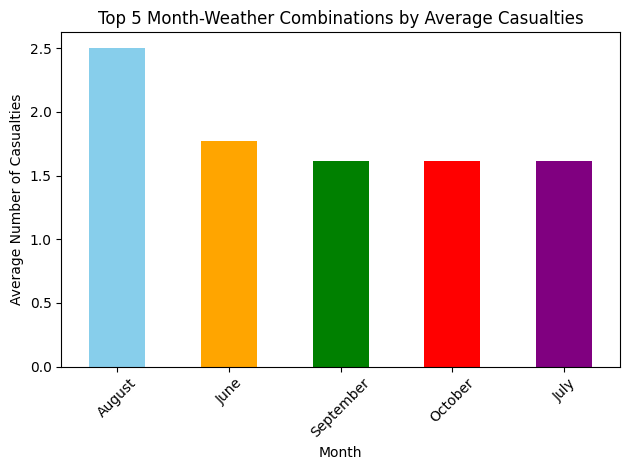

In [299]:
# Data visualization is used to graphically represent data to make patterns, trends, and insights easier to understand and communicate.
colors = ["skyblue", "orange", "green", "red", "purple"]

top5_weather_month.plot(
    x="Month",
    y="Average_Casualties",
    kind="bar",
    color=colors,
    legend=False
)

plt.title("Top 5 Month-Weather Combinations by Average Casualties")
plt.xlabel("Month")
plt.ylabel("Average Number of Casualties")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1> INSIGHT 26: </h1>
<p> Weather conditions play a major role, with snowing + high winds and fog being associated with the most casualties. </p>
<h1> INSIGHT 27: </h1>
<p> The visual contrast in the bar heights makes it immediately clear that August snowing accidents are the most severe, while the other months are significantly lower but still notable. </p>

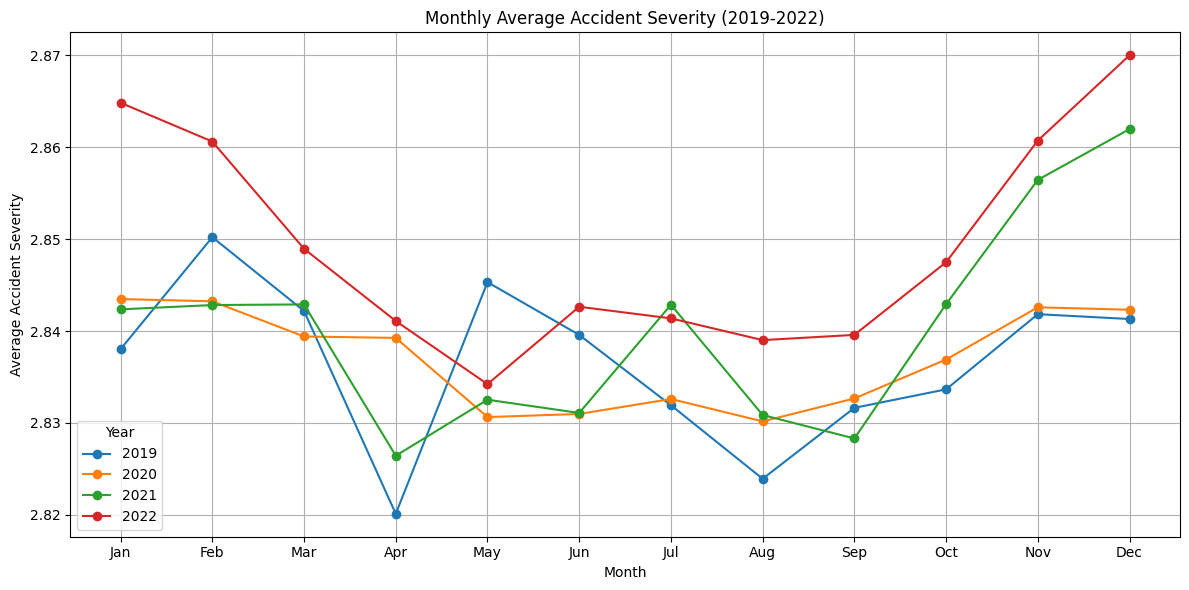

In [300]:
import matplotlib.pyplot as plt

uk_accidents["Accident Date"] = pd.to_datetime(uk_accidents["Accident Date"])
uk_accidents["Year"] = uk_accidents["Accident Date"].dt.year
uk_accidents["Month_Num"] = uk_accidents["Accident Date"].dt.month

uk_accidents["Accident_Severity"] = uk_accidents["Accident_Severity"].astype("category").cat.codes + 1

data_filtered = uk_accidents[uk_accidents["Year"].between(2019, 2022)]

monthly_severity = data_filtered.groupby(["Year", "Month_Num"])["Accident_Severity"].mean().unstack(level=0)
monthly_severity = monthly_severity.reindex(range(1,13), fill_value=0)

month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

ax = monthly_severity.plot(kind="line", figsize=(12,6), marker='o')
ax.set_title("Monthly Average Accident Severity (2019-2022)")
ax.set_xlabel("Month")
ax.set_ylabel("Average Accident Severity")
ax.set_xticks(range(1,13))
ax.set_xticklabels(month_labels)
ax.grid(True)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

<h1>INSIGHT 28:</h1>
<p>2019–2020: Average accident severity was lower in 2020 compared to 2019, likely due to reduced traffic during COVID-19 lockdowns; this shows that lower traffic volumes can significantly reduce the severity of road accidents.</p>

<h1>INSIGHT 29:</h1>
<p>2021–2022: Severity increased as traffic resumed, with winter months consistently showing higher accident severity; this shows that seasonal factors and higher traffic volumes contribute to more serious accidents.</p>


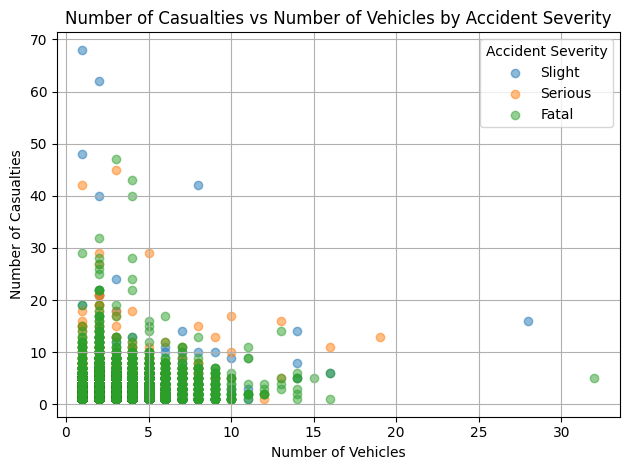

In [301]:
severity_labels = {1: "Slight", 2: "Serious", 3: "Fatal"}

for severity, group in uk_accidents.groupby("Accident_Severity"):
    plt.scatter(group["Number_of_Vehicles"], group["Number_of_Casualties"], 
                label=severity_labels.get(severity, str(severity)), alpha=0.5)

plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.title("Number of Casualties vs Number of Vehicles by Accident Severity")
plt.legend(title="Accident Severity")
plt.grid(True)
plt.tight_layout()
plt.show()

<h1> INSIGHT 30: </h1>
<p>Light accidents tend to have fewer casualties, while serious and fatal accidents involve more, which suggests that both accident severity and the number of vehicles are key indicators of risk and highlights the importance of safety measures in multi-vehicle collisions.
</p>